<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy122_N3L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title-of-Work

Your Name

Date

#  <font color='Red'> **Import Necessary Modules** </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π =  np.pi

###  <font color='Green'> Necessary Defintions. </font>

In [ ]:
###
def rotation_xy(θ):
    """ 
    GIVEN: θ (in degrees) 
    GET: rotation matrix
    """
    θ *= np.pi/180
    return np.array([ [np.cos(θ), -np.sin(θ), 0.], [np.sin(θ), np.cos(θ), 0.], [0., 0., 1.]])

def projection(basis, f_in):
    f_1 = np.dot( basis[0], f_in ) * basis[0]
    f_2 = np.dot( basis[1], f_in ) * basis[1]
    f_3 = np.dot( basis[2], f_in ) * basis[2]
    return [f_1, f_2, f_3]

def Ramp(θ, μS, μK, f_in):

    basis = (rotation_xy(θ) @ np.eye(3)).T

    f_fric, f_normal, f_z = projection(basis, -f_in)

    if np.linalg.norm(f_fric) <= np.linalg.norm( μS * f_normal ):
        None
    if np.linalg.norm(f_fric) > np.linalg.norm( μS * f_normal ):
        f_fric = np.linalg.norm(μK * f_normal) * f_fric / np.linalg.norm(f_fric)

    return f_normal + f_fric + f_z

#  <font color='Red'> **Experiment 1: Familiarization with Definitions.** </font> 

###  <font color='Red'> The Rotation Matrix, print the rotation matrix for 3 angles of your choosing (note the defintion requires the angle in degrees). </font> 

In [ ]:
print( rotation_xy(2) )
print( rotation_xy(20) )
print( rotation_xy(87) )

[[ 0.9994 -0.0349  0.    ]
 [ 0.0349  0.9994  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.9397 -0.342   0.    ]
 [ 0.342   0.9397  0.    ]
 [ 0.      0.      1.    ]]
[[ 0.0523 -0.9986  0.    ]
 [ 0.9986  0.0523  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Choose a rotation matrix from above, to rotate the usual Cartesian Basis (i.e. (Rotation_Matrix @ np.eye(3)).T ) and print the result. </font> 

In [ ]:
basis = (rotation_xy(45) @ np.eye(3)).T
print( basis )

[[ 0.7071  0.7071  0.    ]
 [-0.7071  0.7071  0.    ]
 [ 0.      0.      1.    ]]


###  <font color='Red'> Define an arbitrary acting force vector (3 component vector). </font> 

In [ ]:
f_in  = np.array([0., -9.8, 0.])
print(f_in)

[ 0.  -9.8  0. ]


###  <font color='Red'> Use Newton's 3rd Law to get a Reacting force (tentative. </font> 

In [ ]:
f_react = -f_in
print(f_react)

[-0.   9.8 -0. ]


###  <font color='Red'> Project an arbitrary force vector, i.e. decompose into 3 vectors, e.g. f_in, on the new basis defined above. </font> 

In [ ]:
f_fric, f_normal, f_z = projection(basis, f_react)

###  <font color='Red'> Filter the frictional-projection. 1st, define the static friction coefficient (μS) and then the kinetic friction coefficient (μK). 2nd, define two if-statements to determine if friction component of the force above should be the static XOR kinetic one. </font> 

In [ ]:
μS = 1.0
μK = 0.5

if np.linalg.norm(f_fric) <= np.linalg.norm( μS * f_normal ): ## f_2
    None
if np.linalg.norm(f_fric) > np.linalg.norm( μS * f_normal ):
    f_2 = np.linalg.norm(μK * f_normal) * f_fric

###  <font color='Red'> Now determine the total force: f_in = -f_out $\rightarrow$ f_in + f_out = f_net. e.g. in the static limit f_net = 0. Print this net force. </font> 

In [ ]:
net_force = f_fric + f_normal + f_z + f_in

print("Net Force is %4.3f N" %(np.linalg.norm(net_force) ) )

Net Force is 0.000 N


###  <font color='Red'> Now use: Ramp(θ, μS, μK, f_in), to get the reactive force (f_out), with your choice of angle (θ), static friction coefficient (μS), kinetic friction coefficient (μK), and the f_in you defined above. 

### Add this to f_in, do the results match from above? </font> 

In [ ]:
print("Net Force is %4.3f N" %( np.linalg.norm( Ramp(45, μS, μK, f_in) + f_in ) ) )

Net Force is 0.000 N


#  <font color='Red'> **Experiment 2: Varying Angle.** </font> 

###  <font color='Red'> Define the range of angles you wish to test (using arange). </font> 

In [ ]:
θs = np.arange(0,90,0.1)

NameError: ignored

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the angle array defined above. Fix the value of the static friction, set kinetic friction to 0. Free feel to use the Ramp method. </font> 

In [ ]:
f  = np.zeros(len(θs))
for i in range(len(θs)):
    f[i] = np.linalg.norm( Ramp(θs[i], 1., 0.0, f_in) + f_in )

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font> 

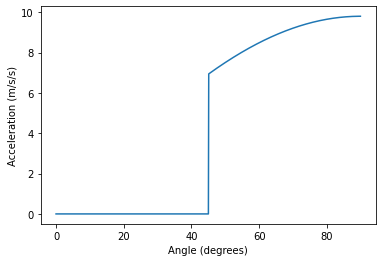

In [ ]:
plt.plot(θs, f)
plt.xlabel("Angle (degrees)")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

#  <font color='Red'> **Experiment 3: Varying Static Friction Coefficient.** </font> 

###  <font color='Red'> Define the range of static-friction-coefficients you wish to test (using arange). </font> 

In [ ]:
μs = np.arange(0,5,0.1)

###  <font color='Red'> Define a for-loop over these values. And get the force-magnitude for every value in the static-friction-coefficient array defined above. Fix the value of the angle, and set kinetic friction to 0. Free feel to use the Ramp method. </font> 

In [ ]:
f  = np.zeros(len(μs))
for i in range(len(μs)):
    f[i] = np.linalg.norm( Ramp(45, μs[i], 0.0, f_in) + f_in )

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font> 

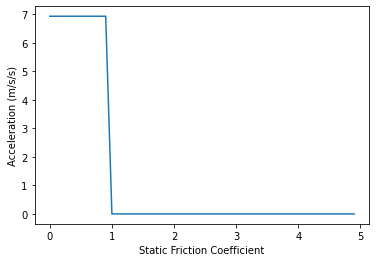

In [ ]:
plt.plot(μs, f)
plt.xlabel("Static Friction Coefficient")
plt.ylabel("Acceleration (m/s/s)")
plt.show()

#  <font color='Red'> **Experiment 4: Kinetic Friction and Dynamics.** </font> 

###  <font color='Red'> Lets consider kinematics as discussed before, using the familiar Velocity-Verlet algorithm. </font> 

###  <font color='Red'> Define the following 9 variables (similar to lab 2):
*   Time Resolution (dt)
*   Time-array
*   Mass of your particle
*   Initial Position (x0)
*   Initial Velocity set to zeros (v0 = np.zeros(3))
*   Initial Acceleration set to zeros (v0 = np.zeros(3))
*   Angle (θ)
*   Static Friction Coefficient (μs)
*   Static Friction Coefficient (μk) 
 </font> 

In [ ]:
θ  = 60
μs = 1.30
μk = 1.8

dt = 0.1 # s
mass = 2 ## kg
g = 10   # m/s/s
x0 = np.array([0.,  10. , 0.])
v0 = np.array([ 0.,  0. , 0.])
a0 = np.array([ 0., -1., 0.]) * mass * g

time = np.arange(0, 3, dt)

###  <font color='Red'> Define an acting force on this particle acting for all times, e.g. the force of gravity (it can be any force), i.e. f_t a 2D array, the same shape of the force defined in lab 2.  </font> 

In [ ]:
f_t_act = np.zeros((len(time), 3 ))
f_t_act[:,1] = -1. * mass * g

###  <font color='Red'> Define your Velocity Verlet, but with the new Force acting-reacting force term! To get the trajectory (for position, velocity, and acceleration)  </font> 

In [ ]:
x_t = np.zeros((len(time), 3 ))
v_t = np.zeros((len(time), 3 ))
a_t = np.zeros((len(time), 3 ))

x_t[0] = x0
v_t[0] = v0
a_t[0] = (Ramp(θ, μs, μk, f_t_act[0]) + f_t_act[0] )/mass

for t in range(1,len(time)):
    x_t[t] = x_t[t-1] + v_t[t-1] * dt + a_t[t-1] * dt * dt /2
    a_t[t] = (Ramp(θ, μs, μk, f_t_act[t]) + f_t_act[t] )/mass
    v_t[t] = v_t[t-1] + (a_t[t-1] + a_t[t]) * dt / 2

###  <font color='Red'> Plot your Results, make sure to leave a caption describing the physics of the graph. </font> 

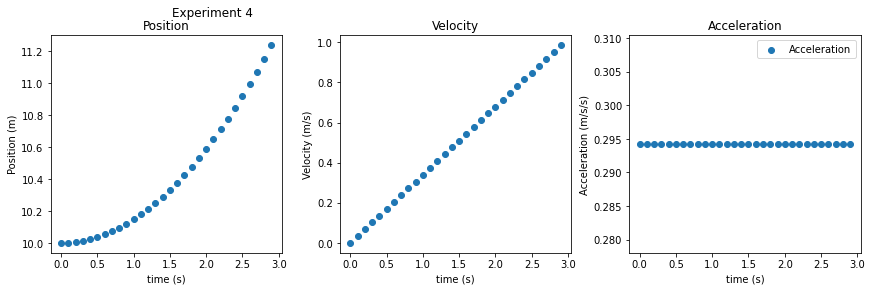

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment 4')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,1])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

#ax2.scatter(time, v_t[:,1])
ax2.scatter(time, np.linalg.norm(v_t, axis=1))
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(time, a_t[:,1], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

#  <font color='Red'> **Conclusion:** </font>

###  <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###  <font color='Red'> Demonstrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>


###  <font color='Red'> If your surface is completely parallel to the gravity-vector $\mathbf{g}$ (i.e. angle is 90 degrees from horizontal surface), can static friction support the object on this surface? </font>

In [ ]:
f_in = np.array([0., -9.81, 0.])
Ramp(90, 100000, 0, f_in) + f_in

array([-0.  , -9.81,  0.  ])

###  <font color='Red'> Is there an angle, such that no motion occurs with a static friction coefficient of 0.0? </font>